In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
init_printing()

In [2]:
x1, x2, ρ, ρ1, ρ2, m, m1, m2, w, w1, w2, W1, W2 = symbols('x1 x2 ρ ρ1 ρ2 m m1 m2 w w1 w2 W1 W2') 

# Oblique

In [135]:
w1 = w
w2 = 1/w
W1 = w1*x1 + 1-x1
W2 = w2*x2 + 1-x2
m1 = m
m2 = m
ρ1 = 0
ρ2 = 0
eqs = [
    (1-m1)*x1*(w1/W1*ρ1+1-ρ1) + m2*x2*(w2/W2*ρ2+1-ρ2) - x1,
    (1-m2)*x2*(w2/W2*ρ2+1-ρ2) + m1*x1*(w1/W1*ρ1+1-ρ1) - x2
]
eqs

In [136]:
sol = solve(eqs, (x1, x2))
sol

# Vertical

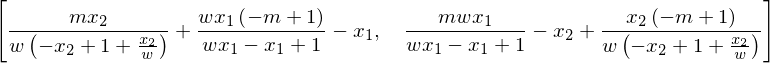

In [23]:
w1 = w
w2 = 1/w
W1 = w1*x1 + 1-x1
W2 = w2*x2 + 1-x2
m1 = m
m2 = m
ρ1 = 1
ρ2 = 1
eqs = [
    (1-m1)*x1*(w1/W1*ρ1+1-ρ1) + m2*x2*(w2/W2*ρ2+1-ρ2) - x1,
    (1-m2)*x2*(w2/W2*ρ2+1-ρ2) + m1*x1*(w1/W1*ρ1+1-ρ1) - x2
]
eqs

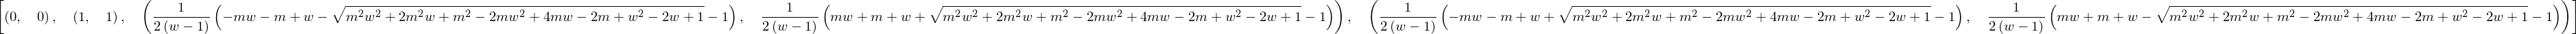

In [24]:
sol = solve(eqs, (x1, x2))
sol

In [25]:
simplify(
    (-(sol[2][0]*2*(w-1)+m*w+m-w+1))**2 - (m**2*(w+1)**2 + (w-1)**2*(1-2*m))
)

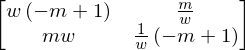

In [26]:
J00 = Matrix([
    [
        (x1+eqs[0]).diff(x1), (x1+eqs[0]).diff(x2)
    ],
    [
        (x2+eqs[1]).diff(x1), (x2+eqs[1]).diff(x2)
    ]
]).subs({x1:0, x2:0})
J00

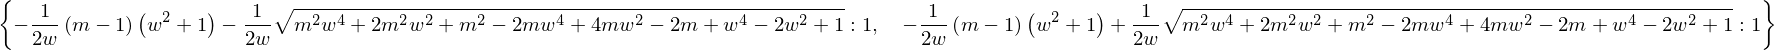

In [27]:
eigs00 = J00.eigenvals()
eigs00

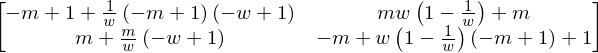

In [8]:
J11 = Matrix([
    [
        (x1+eqs[0]).diff(x1), (x1+eqs[0]).diff(x2)
    ],
    [
        (x2+eqs[1]).diff(x1), (x2+eqs[1]).diff(x2)
    ]
]).subs({x1:1, x2:1})
J11

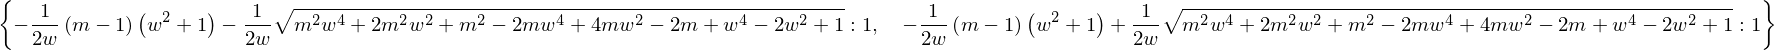

In [9]:
eigs11 = J11.eigenvals()
eigs11 

In [10]:
eigs11 == eigs00

True

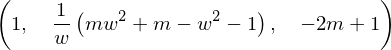

In [28]:
poly = J00.charpoly()
a, b, c = poly.coeffs()
a, b, c

In [29]:
b_ = -(1-m)*(w**2+1)/w
simplify(b - b_)

In [30]:
c_ = 1-2*m
simplify(c - c_)

In [31]:
abc = -(1-m)*(w-1)**2/w
simplify(a+b+c - abc)

In [46]:
print(latex(simplify((b_**2 - 4*c_).factor(m))))

\frac{1}{w^{2}} \left(m^{2} \left(w^{4} + 2 w^{2} + 1\right) - 2 m \left(w^{4} - 2 w^{2} + 1\right) + w^{4} - 2 w^{2} + 1\right)


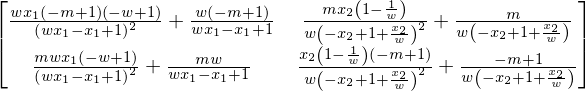

In [24]:
Jxstar = Matrix([
    [
        (x1+eqs[0]).diff(x1), (x1+eqs[0]).diff(x2)
    ],
    [
        (x2+eqs[1]).diff(x1), (x2+eqs[1]).diff(x2)
    ]
])
Jxstar

# Vertical + Oblique

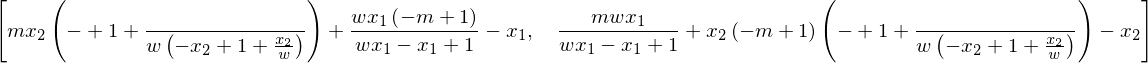

In [6]:
w1 = w
w2 = 1/w
W1 = w1*x1 + 1-x1
W2 = w2*x2 + 1-x2
m1 = m
m2 = m
ρ1 = 1
ρ2 = ρ
eqs = [
    (1-m1)*x1*(w1/W1*ρ1+1-ρ1) + m2*x2*(w2/W2*ρ2+1-ρ2) - x1,
    (1-m2)*x2*(w2/W2*ρ2+1-ρ2) + m1*x1*(w1/W1*ρ1+1-ρ1) - x2
]
eqs

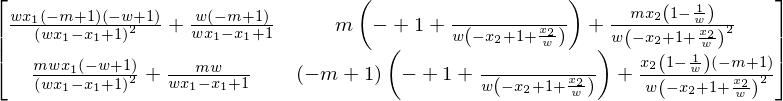

In [7]:
J = Matrix([
    [
        (x1+eqs[0]).diff(x1), (x1+eqs[0]).diff(x2)
    ],
    [
        (x2+eqs[1]).diff(x1), (x2+eqs[1]).diff(x2)
    ]
])
J

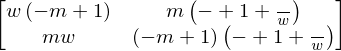

In [8]:
J00 = J.subs({x1:0, x2:0})
J00

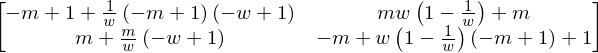

In [9]:
J11 = J.subs({x1:1, x2:1})
J11

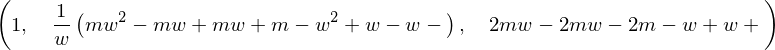

In [15]:
a, b, c = J00.charpoly().coeffs()
a, b, c

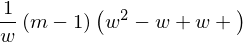

In [16]:
b = b.factor(m)
b

In [17]:
print(latex(b))

\frac{1}{w} \left(m - 1\right) \left(w^{2} - w ρ + w + ρ\right)


In [18]:
c = c.factor(m)
c

In [19]:
c_ = (1-2*m)*(w*(1-ρ)+ρ)
simplify(c - c_)

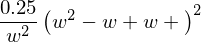

In [20]:
Δ = (b**2 - 4*a*c)
simplify(Δ.subs({m:0.5}))

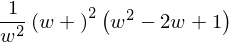

In [21]:
simplify(Δ.subs({m:0}).factor(ρ))

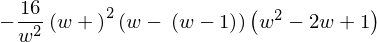

In [105]:
am, bm, cm = Δ.as_poly(m).coeffs()
simplify((bm**2 - 4*am*cm).factor(ρ))

In [12]:
(a+b+c).factor(ρ).subs({ρ:0})

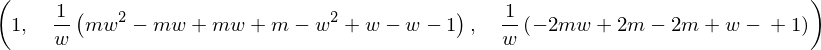

In [10]:
a, b, c = J11.charpoly().coeffs()
a, b, c

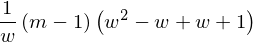

In [11]:
b = b.factor(m)
b

In [12]:
b_ = -(1-m)/w * (w*(1-ρ) + 1 + w**2 * ρ)
simplify(b - b_)

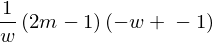

In [13]:
c = c.factor(m)
c

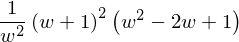

In [60]:
Δ = b**2 - 4 * a * c
simplify(Δ.subs({m:0}).factor(ρ))

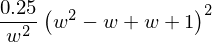

In [61]:
simplify(Δ.subs({m:0.5}))

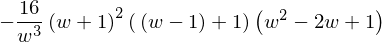

In [62]:
am, bm, cm = Δ.as_poly(m).coeffs()
simplify((bm**2 - 4*am*cm).factor(ρ))

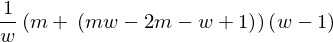

In [14]:
(a+b+c).factor(ρ)

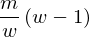

In [15]:
(a+b+c).subs({ρ:0}).factor(m)

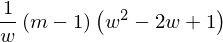

In [16]:
(a+b+c).subs({ρ:1}).factor(m)

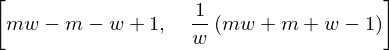

In [21]:
simplify((2*a+b).as_poly(ρ).coeffs())

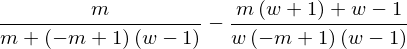

In [51]:
difer = (m/(m+(1-m)*(w-1)) - ((m*(w+1)+w-1)/(w*(w-1)*(1-m))))
difer

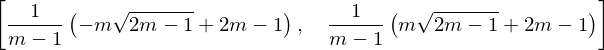

In [52]:
solve(difer, w)

In [56]:
difer.subs({m:0,w:2})

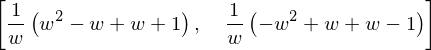

In [42]:
simplify((2*a+b).as_poly(m).coeffs())

In [45]:
simplify((1+w-w*ρ+w**2*ρ).factor(w))

# Asymmetric migration

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
init_printing()

from numpy.random import uniform
import pandas as pd

In [2]:
x1, x2, ρ1, ρ2, m1, m2, w1, w2, w, W1, W2 = symbols('x_1 x_2 ρ_1 ρ_2 m_1 m_2 w_1 w_2 w W_1 W_2') 

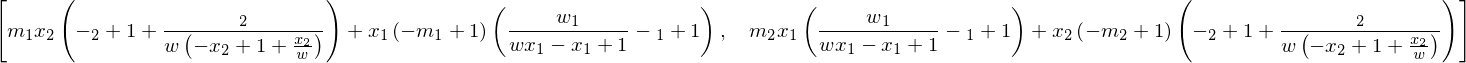

In [3]:
# eq. 19
w1 = w
w2 = 1/w
W1 = w1*x1 + 1-x1
W2 = w2*x2 + 1-x2
# γ1 = (1-m) + τ*m
# γ2 = m + τ*(1-m)
eqs = [
    (1-m1)*x1*(w1/W1*ρ1+1-ρ1) + m1*x2*(w2/W2*ρ2+1-ρ2),
    m2*x1*(w1/W1*ρ1+1-ρ1) + (1-m2)*x2*(w2/W2*ρ2+1-ρ2)
]
eqs

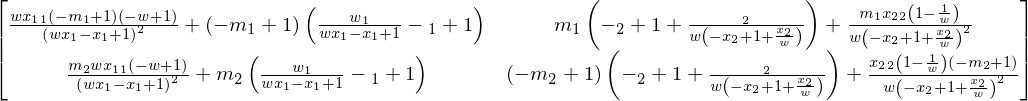

In [4]:
J = Matrix([
    [
        eqs[0].diff(x1), eqs[0].diff(x2)
    ],
    [
        eqs[1].diff(x1), eqs[1].diff(x2)
    ]
])
J

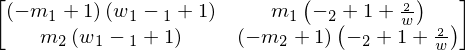

In [5]:
J00 = J.subs({x1:0, x2:0})
J00

In [6]:
λ0a, λ0b = J00.eigenvals()

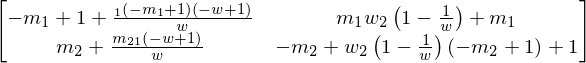

In [7]:
J11 = J.subs({x1:1, x2:1})
J11

In [8]:
λ1a, λ1b = J11.eigenvals()

In [9]:
subs = {
#     m1: uniform(0, 0.5), 
    m2: uniform(0, 0.5),
#     ρ1: uniform(0, 1), 
    ρ2: uniform(0, 1), 
    w: 2
}
subs[m1] = 10*subs[m2]
subs[ρ1] = subs[ρ2]/10

if λ0a.subs(subs)<1 and λ0b.subs(subs)<1:
    print('B fixation (0,0) stable')
else:
    print('B fixation (0,0) unstable')

if λ1a.subs(subs)<1 and λ1b.subs(subs)<1:
    print('A fixation (1,1) stable')
else:
    print('A fixation (1,1) unstable')

B fixation (0,0) stable
A fixation (1,1) unstable


In [17]:
n = 10000
m1s = uniform(0, 0.5, n)
m2s = uniform(0, 0.5, n)
ρ1s = uniform(0, 1, n) 
ρ2s = uniform(0, 1, n)

In [26]:
subs = [
    {
        m1: m1_,
        m2: m2_,
        ρ1: ρ1_,
        ρ2: ρ2_,
        w: 2
    }
    for m1_, m2_, ρ1_, ρ2_ in zip(m1s, m2s, ρ1s, ρ2s)
]

A_fixation = [
    λ1a.subs(subs_) < 1 and λ1b.subs(subs_) < 1
    for subs_ in subs    
]

B_fixation = [
    λ0a.subs(subs_) < 1 and λ0b.subs(subs_) < 1
    for subs_ in subs    
]

In [27]:
df = pd.DataFrame(
    {'m1':m1s, 'm2':m2s, 
     'ρ1': ρ1s, 'ρ2': ρ2s, 
     'A fixation': A_fixation, 'B fixation': B_fixation})

df['A fixation'] = df['A fixation'].astype(bool)
df['B fixation'] = df['B fixation'].astype(bool)

df['protected polymorphism'] = (~df['A fixation']) & (~df['B fixation'])
df.to_csv('polymorphism.csv')
df.head()

,A fixation,B fixation,m1,m2,ρ1,ρ2,protected polymorphism
0,False,False,0.245784,0.043055,0.850691,0.585064,True
1,False,False,0.438421,0.150517,0.997667,0.719539,True
2,False,False,0.371408,0.282400,0.663591,0.750788,True
3,False,False,0.271529,0.174650,0.642538,0.762179,True
4,False,False,0.273647,0.128274,0.854442,0.263908,True


In [28]:
df['m_ratio'] = df['m1'] / df['m2']
df['ρ_ratio'] = df['ρ1'] / df['ρ2']

In [29]:
def outcome(x):
    if x['A fixation']:
        return 'A fixation'
    elif x['B fixation']:
        return 'B fixation'
    else:
        return 'Polymorphism'

df['outcome'] = [outcome(row) for _, row in df.iterrows()]

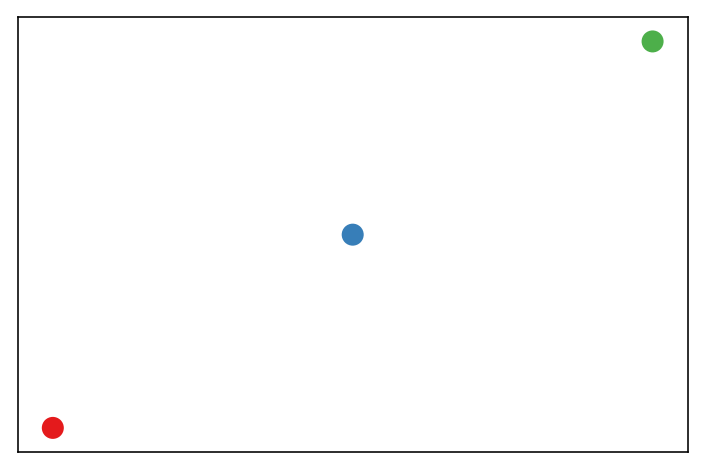

In [30]:
colors = plt.cm.Set1.colors[:3]
red, blue, green = colors
plt.scatter([1, 2, 3], [1, 2, 3], c=colors, s=100)
plt.xticks([]); plt.yticks([]);

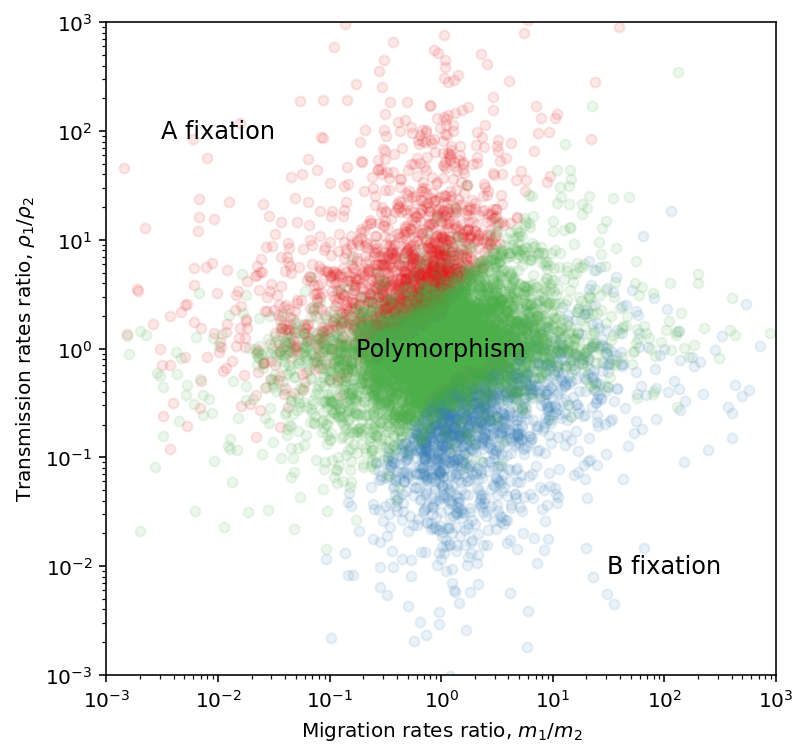

In [33]:
fig, ax = plt.subplots(figsize=(6, 6))

colors = {'B fixation': blue, 'A fixation': red, 'Polymorphism': green}
positions = {'B fixation': (100, 1/100), 'A fixation': (1/100, 100), 'Polymorphism': (1,1)}
scatter_kws = dict(marker='.', markersize=10, ls='', clip_on=True, alpha=1/10)

for key, grp in df.groupby('outcome'):
    ax.plot('m_ratio', 'ρ_ratio', color=colors[key], label=key, data=grp, **scatter_kws)
    ax.annotate(key, positions[key], xycoords='data', ha='center', va = 'center', fontsize='large')
ax.set(
    xscale='log',
    yscale='log',
    xlim=(1e-3, 1e3),
    ylim=(1e-3, 1e3),
    xlabel=r'Migration rates ratio, $m_1/m_2$',
    ylabel=r'Transmission rates ratio, $\rho_1/\rho_2$',
#     title='$Fitness: w_1=1/w_2={}$'.format(w_),
)
fig.savefig('../figures/asym_migration.pdf', dpi=300)